# Figure 6: Confidence scores and runtime 
(A) Boxplots (see Methods) of confidence-scores for the predicted cell
types depending of true and false predictions of each of the methods providing confidence scores for three example
cell types. For the other cell types see supplementary figure S3.
(B) runtime in seconds on a CentOS7 cluster with a
memory limit of 16G on one core with 8CPU available.

In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library("RColorBrewer")
library(ggplot2)
library(dplyr)
library(purrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell", "Plasmacytoid dendritic cell")
coi <- c("Cytotoxic T cell", "Natural killer cell","Dendritic cell", "Plasmacytoid dendritic cell" ) # cell types of interest
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
runtime <- read.csv("../Results//Files/runtime.txt", sep=" ", header=F)
confidence_scores <- read.csv("../Results_old/Files/confidence_scores.csv")
colnames(runtime) <- c("Method", "Tag", "Runtime")
runtime[c('Reference', 'Size', "Set")] <- stringr::str_split_fixed(runtime$Tag, '_', 3)

runtime <- runtime[runtime$Reference =="PBMCMosaic2",]
runtime$Runtime <- as.numeric(runtime$Runtime)
runtime$Size <- as.numeric(runtime$Size)

runtime$Method[runtime$Method=="SCN"] <- "SingleCellNet"
runtime$Method <- factor(runtime$Method, levels=methods)
runtime <- runtime[!is.na(runtime$Runtime),]
runtime <- runtime[runtime$Runtime > 27,]

In [4]:
runtime[runtime$Size == 3000 & runtime$Method == "CellID",]

,Method,Tag,Runtime,Reference,Size,Set
,<fct>,<chr>,<dbl>,<chr>,<dbl>,<chr>
403,CellID,PBMCMosaic2_3000_1,263,PBMCMosaic2,3000,1


`summarise()` has grouped output by 'Size', 'Method'. You can override using the `.groups` argument.


Size,Method,Reference,mean,p25,p75
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>
38,Seurat,PBMCMosaic2,30,29.00,33.25
38,SingleR,PBMCMosaic2,29,28.25,31.25
38,CellID,PBMCMosaic2,126,114.00,128.00
38,SingleCellNet,PBMCMosaic2,66,56.00,66.00
38,ItClust,PBMCMosaic2,110,99.25,116.75
100,Seurat,PBMCMosaic2,37,36.00,41.50


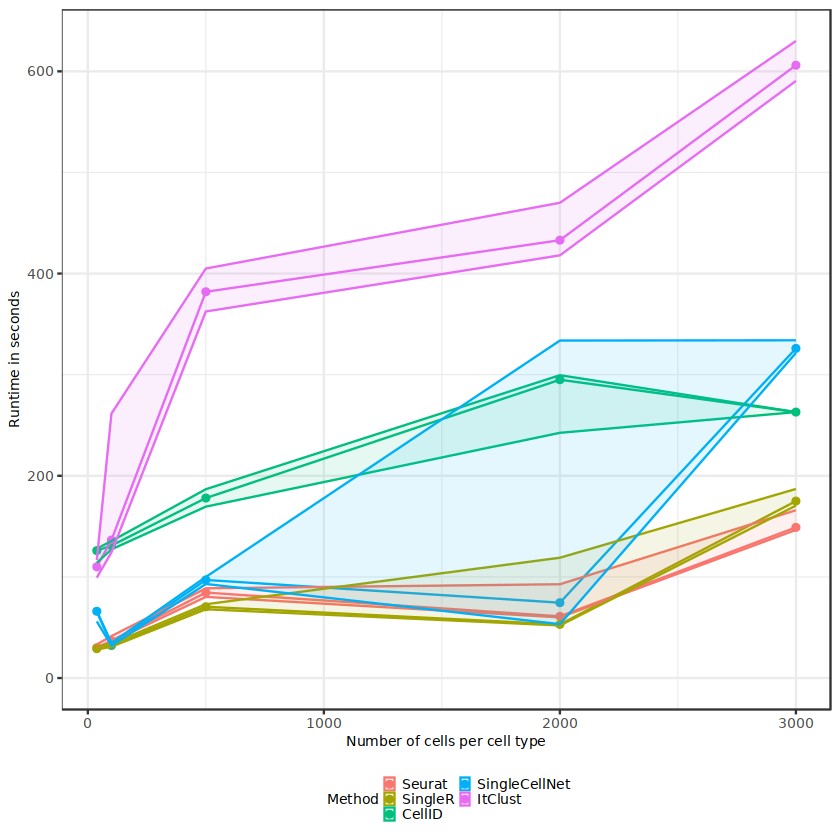

In [5]:
runtime <- runtime[runtime$Size <= 3000,]
runtime <- runtime[runtime$Size >= 38,]
runtime <- runtime[runtime$Size != 1000,]
runtime_summary <- runtime %>% 
           dplyr::group_by(Size, Method, Reference) %>% 
           dplyr::summarize(mean = median(Runtime),
                            p25 = quantile(Runtime, probs = c(0.25)),
                            p75 = quantile(Runtime, probs = c(0.75))) 
head(runtime_summary)
f6a <- ggplot(runtime_summary, aes(as.numeric(Size), mean,
                                   color=Method, group=Method, fill= Method)) +
        geom_point() + geom_line() + 
        geom_ribbon(aes(ymin = p25, ymax = p75), alpha = 0.1)+ 
        guides(linetype=guide_legend(ncol=2), color=guide_legend(ncol=2))

f6a <- addFormatting(f6a, "Runtime in seconds", "Number of cells per cell type", "bottom", " ",
                     ylim=c(0,max(runtime_summary$p75)))


  
f6a

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message in grid.Call.graphics(C_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”


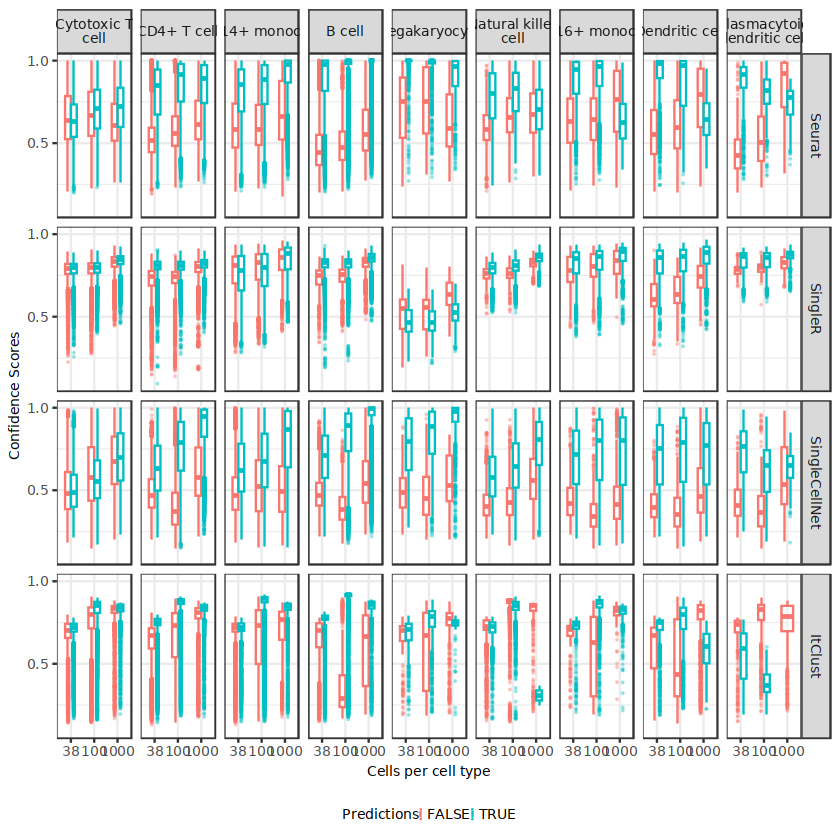

In [6]:
confidence_scores$method[confidence_scores$method =="SCN"]<- "SingleCellNet"

confidence_scores$class <- factor(confidence_scores$class, levels=celltypes)
confidence_scores$method <- factor(confidence_scores$method, levels=methods)

f2c <- plot_confidence_scores(confidence_scores[confidence_scores$class %in% coi,])
s2 <- plot_confidence_scores(confidence_scores)
s2

ggsave(
  "../Results/Figures/s2_ConfidenceScores.eps",
  plot = s2,
  device = "eps",
  path = NULL,
  scale = 1,
  width = 180,
  height = 100,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)  

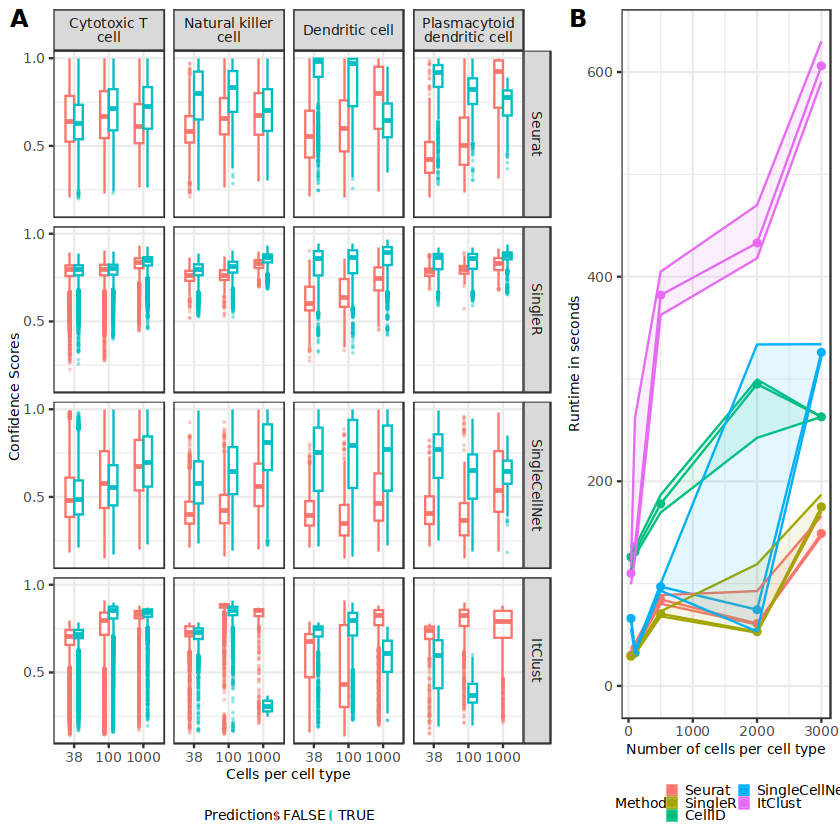

In [7]:
f2bc <- ggpubr::ggarrange(f2c, f6a, nrow=1, ncol=2, labels= c("A", "B"), widths=c(2,1))
f2bc

In [8]:
ggsave(
  "../Results/Figures/F6_ConfidenceScores.eps",
  plot = f2bc,
  device=cairo_ps, fallback_resolution = 600,
  path = NULL,
  scale = 1,
  width = 180,
  height = 100,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)